In [1]:
import os
import pathlib
import pprint
import sys

import matplotlib.pyplot as plt
import numpy as np
from spdm.logger import logger
from spdm.data.File import File
from spdm.data.Mapping import Mapping


2022-10-27 09:32:13,487 DEBUG [spd] /home/salmon/workspace/SpDB/python/spdm/sp_export.py:101:sp_find_module_by_name: Load module spdm.plugins.data.file.PluginXML
2022-10-27 09:32:13,489 DEBUG [spd] /home/salmon/workspace/SpDB/python/spdm/data/File.py:65:__init__: Open XMLFile: [PosixPath('/home/salmon/workspace/fytok_data/mapping/EAST/imas/3/static/config.xml'), PosixPath('/home/salmon/workspace/fytok_data/mapping/EAST/imas/3/dynamic/config.xml')] mode='r'
2022-10-27 09:32:13,511 DEBUG [spd] /tmp/ipykernel_10728/1670394331.py:5:<module>: [2.844  2.8204 2.7737 2.7046 2.6143 2.5045 2.3771 2.2343 2.0786 1.9127
 1.7389 1.5637 1.3995 1.2722 1.2108 1.199  1.199  1.199  1.199  1.199
 1.199  1.199  1.199  1.199  1.199  1.2108 1.2722 1.3995 1.5637 1.7389
 1.9127 2.0786 2.2343 2.3771 2.5045 2.6143 2.7046 2.7737 2.8204 2.844 ]
2022-10-27 09:32:13,515 DEBUG [spd] /tmp/ipykernel_10728/1670394331.py:7:<module>: [ 0.089216  0.26608   0.43828   0.6028    0.75671   0.89735   1.0223
  1.1292    1.2164  

(0.4099695, 3.4525805000000003, -2.2861135000000004, 2.2861135000000004)

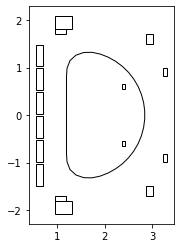

In [2]:
mapping = Mapping(mapping_path="/home/salmon/workspace/fytok_data/mapping")

entry = mapping.find("EAST")

logger.debug(entry.get("wall.description_2d.vessel.annular.outline_outer.r"))

logger.debug(entry.get("wall.description_2d.vessel.annular.outline_outer.z"))

plt.gca().add_patch(plt.Polygon(np.array([entry.get("wall.description_2d.vessel.annular.outline_outer.r"),
                                            entry.get("wall.description_2d.vessel.annular.outline_outer.z")]).transpose([1, 0]),
                                fill=False, closed=True))

for coil in entry.get("pf_active.coil"):
    rect = coil.get(["element", 0, "geometry","rectangle"]).dump_named()
    plt.gca().add_patch(plt.Rectangle((rect.r-rect.width/2.0, rect.z -
                                        rect.height/2.0), rect.width, rect.height, fill=False))
plt.axis('scaled')

In [4]:
m_entry = mapping.map(File("/home/salmon/public_data/efit_east", format="mdsplus").read(), source_schema="EAST")

logger.debug(entry.get(["equilibrium","time_slice", 0, "profiles_2d","psi"]))


2022-10-27 07:45:19,080 DEBUG [spd] /home/salmon/workspace/SpDB/python/spdm/data/File.py:65:__init__: Open MDSplusFile: /home/salmon/public_data/efit_east mode='r'
2022-10-27 07:45:19,082 DEBUG [spd] /home/salmon/workspace/SpDB/python/spdm/data/File.py:65:__init__: Open XMLFile: [PosixPath('/home/salmon/workspace/fytok_data/mapping/EAST/imas/3/static/config.xml'), PosixPath('/home/salmon/workspace/fytok_data/mapping/EAST/imas/3/dynamic/config.xml')] mode='r'
2022-10-27 07:45:19,092 DEBUG [spd] /tmp/ipykernel_5870/780853275.py:3:<module>: <psi  path="" />
